In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import sys

import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
# from mpl_toolkits.axes_grid1 import make_axes_locatable
params = {'font.size':14,'font.family':'lmodern','xtick.labelsize':16, 'ytick.labelsize':16,}

# plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../WaveformAnalysis/')

import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt
import IVCurve as IVCurve
import importlib
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.special import erfc
import scipy.signal as spsig

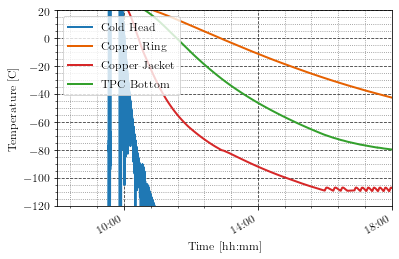

In [2]:
Sensors = []
Files = ['/project/david_moore/aj487/Data_WL110/LXe_Setup/Sensors/20211108.h5']
for File in Files: 
    Sensor = Monitor.SensorData(Filepath=File)
    Sensor.GetData()
    Sensors.append(Sensor)

AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors)
XRange = [dt.datetime(2021,11,8,8,0), dt.datetime(2021,11,8,18,0)]
AllSensors.PlotData(Data=AllSensors.Temp, Selection='Temperature', XTicks=240, YTicks=20, XRange=XRange, YRange=[-120,20])

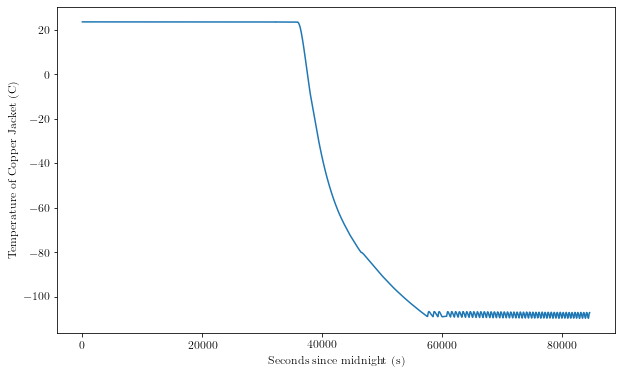

In [3]:
time_sec=[]
start=dt.datetime(2021,11,8,0,0)
for time in AllSensors.Time:
    time_sec.append((time-start).seconds)
plt.figure(figsize=(10,6))
plt.xlabel('Seconds since midnight (s)')
plt.ylabel('Temperature of Copper Jacket (C)')
plt.plot(time_sec,AllSensors.Temp[2])
plt.show()

/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/24C.h5


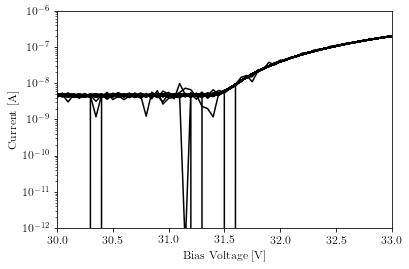

In [4]:
data_24C = IVCurve.IVCurve(Path='/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/', Selection='*24C.h5')


for File in data_24C.Files:
    print(File)
    data_24C.get_data()
    size=len(data_24C.Voltage)
    data_24C.get_average(Size=size)
    data_24C.get_gradient(data_24C.AvgVoltage,data_24C.AvgCurrent)
    data_24C.format_timestamp(Format='datetime')
    data_24C.plot()

94
[]


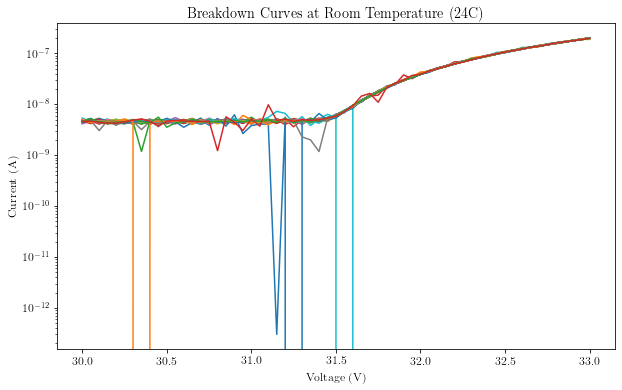

In [5]:
plt.figure(figsize=(10,6))

avg_timestamp=[]
size=len(data_24C.Timestamp)#94 #34211
# size=10
print (size)
for i in range(len(data_24C.Timestamp)):
    if i*size>=len(data_24C.Timestamp):
        break
#     print (i*size,data_24C.Timestamp[i*size])
#     avg_timestamp.append(data_24C.Timestamp[i*size])
# print (data_24C.Timestamp[-1])
# avg_timestamp.append(data_24C.Timestamp[-1])
print(avg_timestamp)
for x,y,z in zip(data_24C.Voltage,data_24C.Current,data_24C.Timestamp):
    plt.plot(x,y,label=z)
#     print(z)
# plt.legend(loc=2)
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Breakdown Curves at Room Temperature (24C)')
plt.yscale('log')
plt.show()

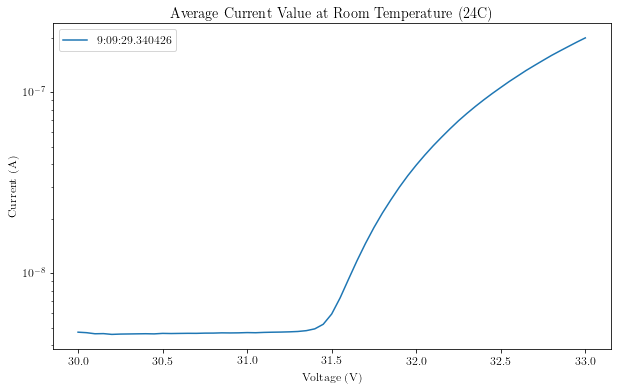

In [6]:
plt.figure(figsize=(10,6))
# print (data_24C.AvgCurrent)
# print (data_24C.AvgVoltage)
# print (data_24C.AvgTimestamp)
# print (data_24C.Datetime)
for x,y,z in zip(data_24C.AvgVoltage,data_24C.AvgCurrent,data_24C.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
plt.legend(loc='upper left')
plt.yscale('log')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Average Current Value at Room Temperature (24C)')
plt.show()

[31.6]
31.608657441903965


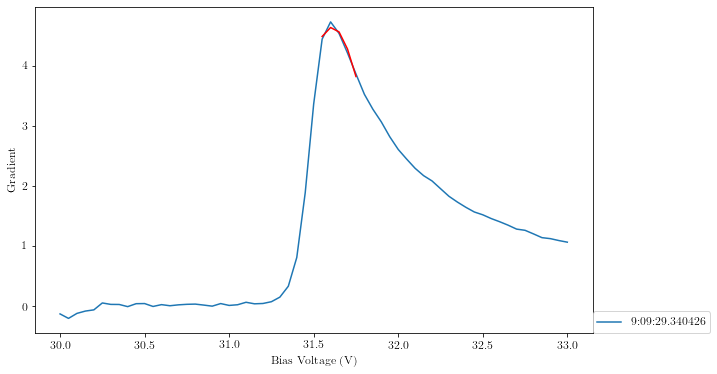

In [7]:
plt.figure(figsize=(10,6))

def func(x,a,mu,sigma):
    return a*np.exp(-((x-mu)**2)/(2*sigma**2))

for x,y,z in zip(data_24C.AvgVoltage,data_24C.Gradient,data_24C.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
    min_x=31.5
    max_x=31.8
    cut=np.where((x<max_x) & (x>min_x))[0]
    popt,pcov=curve_fit(func,x[cut],y[cut],p0=[np.max(y/x),x[np.where(y/x==np.max(y/x))][0],2],maxfev=100000)
    plt.plot(x[cut],func(x[cut],*popt),color='r')
    grad_max=(x[np.where(y==np.max(y))])
    print (grad_max)
    print (popt[1])
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Gradient')
plt.legend(loc=(1.0,0))
plt.show()

In [8]:
data = IVCurve.IVCurve(Path='/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/', Selection='*Cooldown.h5')
for File in data.Files:
    print(File)
    data.get_data()
    print(len(data.Current))
    data.get_average(Size=10)
    print(len(data.Current))
    data.get_gradient(data.AvgVoltage,data.AvgCurrent)
    data.format_timestamp(Format='datetime')
#     data.plot()

/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/Cooldown.h5
170
170


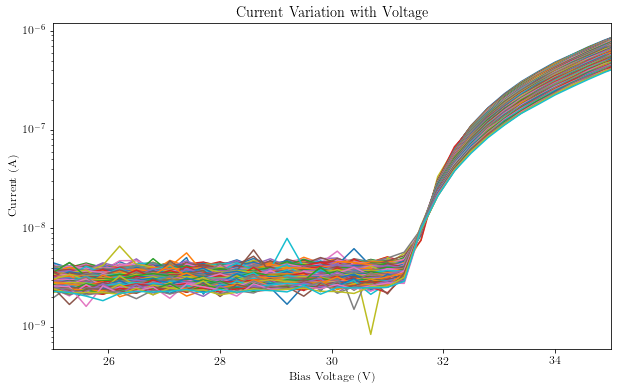

In [9]:
all_current=[]
all_voltage=[]
all_timestamp=[]
all_temperature=[]

plt.figure(figsize=(10,6))
# print(len(data.Current))
size=10

for i in range(len(data.Timestamp)):
    if i*size>=len(data.Timestamp):
        break
#     print (i*size,data.Timestamp[i*size])
    avg_timestamp.append(data.Timestamp[i*size])
avg_timestamp.append(data.Timestamp[-1])
# print (avg_timestamp)
for x,y,z in zip(data.Voltage,data.Current,data.Timestamp):
    plt.plot(x,y,label=z)#,color=color_array[y])
    all_voltage.append(x)
    all_current.append(y)
    all_timestamp.append(float(z))
#     sub=np.abs(np.array(time_sec)-np.array(z))
#     cut=np.where(sub==np.min(sub))
#     print(AllSensors.Temp[2][cut][0])
#     breakdown_temp.append(AllSensors.Temp[2][cut][0])
# plt.legend(loc=2)


plt.xlim(25,35)
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Current Variation with Voltage')
plt.yscale('log')
plt.show()

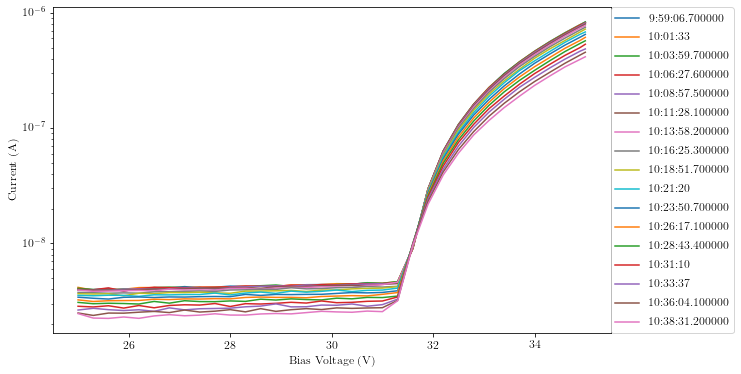

In [10]:
plt.figure(figsize=(10,6))
# print (data.AvgCurrent)
# print(data.AvgVoltage)
for x,y,z in zip(data.AvgVoltage,data.AvgCurrent,data.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.legend(loc=(1.0,0))
plt.show()

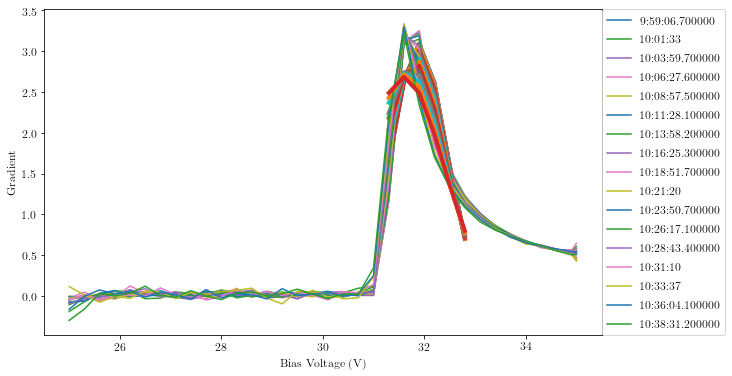

17
17
17


In [11]:
plt.figure(figsize=(10,6))
breakdownV=[]
breakdownv_fit=[]
timestampT=[]
# print(breakdownV)
# print(timestampT)
# print(breakdownv_fit)

for x,y,z in zip(data.AvgVoltage,data.Gradient,data.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
    min_x=31
    max_x=33
    cut=np.where((x<max_x) & (x>min_x))[0]
    popt,pcov=curve_fit(func,x[cut],y[cut],p0=[np.max(y/x),x[np.where(y/x==np.max(y/x))][0],2],maxfev=100000)
    plt.plot(x[cut],func(x[cut],*popt),lw=4)
    grad_max=(x[np.where(y==np.max(y))])
#     print (grad_max)
    breakdownV.append(grad_max)
    timestampT.append(z)
    breakdownv_fit.append(popt[1])
#     print (popt[1])
    

plt.xlabel('Bias Voltage (V)')
plt.ylabel('Gradient')
plt.legend(loc=(1.0,0))
plt.show()

print(len(breakdownV))
print(len(timestampT))
print(len(breakdownv_fit))

In [12]:
data_2=IVCurve.IVCurve(Path='/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/',Selection='*Cooldown_2.h5')
for File in data_2.Files:
    print (File)
    data_2.get_data()
    print(len(data_2.Current))
    data_2.get_average(Size=20)
    print(len(data_2.Current))
    data_2.get_gradient(data_2.AvgVoltage,data_2.AvgCurrent)
    data_2.format_timestamp(Format='datetime')

/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/Cooldown_2.h5
214
214


214
['35881', '36027', '36174', '36321', '36470', '36620', '36771', '36919', '37066', '37212', '37365', '37511', '37658', '37804', '37950', '38098', '38245', '38378', '39698', '40015', '40332', '40653', '40976', '41305', '41638', '41974', '42315', '42662', '43012', '43244']


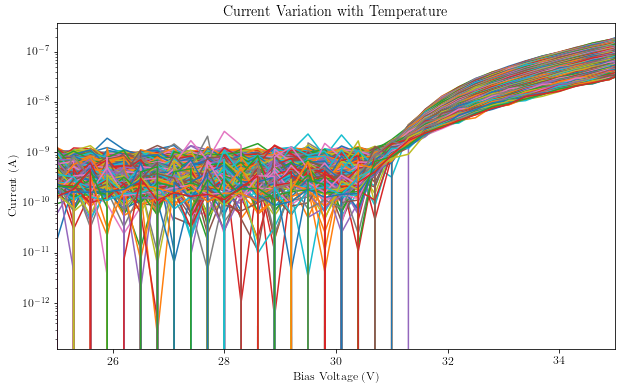

In [13]:
plt.figure(figsize=(10,6))
print(len(data_2.Current))
# color_array,sm=get_color_map(len(data_2.Current))
size=20
for i in range(len(data_2.Timestamp)):
#     print(data_2.Timestamp[i])
    if (i*size)>=len(data_2.Timestamp):
        break
    avg_timestamp.append(data_2.Timestamp[i*size]) 
#     print (data_2.Timestamp[i*size])
avg_timestamp.append(data_2.Timestamp[-1])    
print (avg_timestamp)
for x,y,z in zip(data_2.Voltage,data_2.Current,data_2.Timestamp):
    plt.plot(x,y,label=z)#,color=color_array[y])
    all_voltage.append(x)
    all_current.append(y)
    all_timestamp.append(float(z))
# plt.legend(loc=2)
plt.xlim(25,35)
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Current Variation with Temperature')
plt.yscale('log')
plt.show()

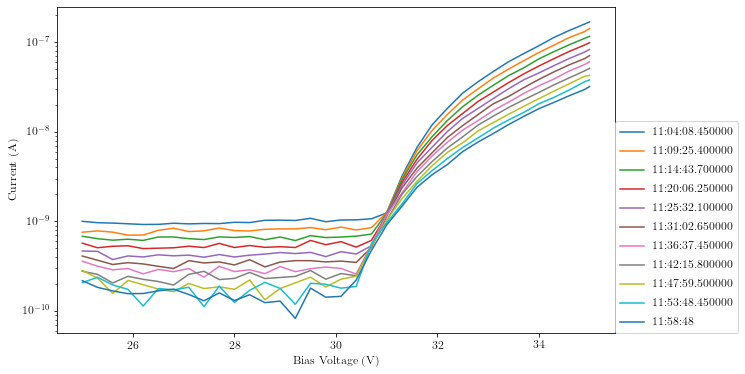

In [14]:
plt.figure(figsize=(10,6))
# print (data_2.AvgCurrent)
# print(data_2.AvgVoltage)
for x,y,z in zip(data_2.AvgVoltage,data_2.AvgCurrent,data_2.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.legend(loc=(1.0,0))
plt.show()

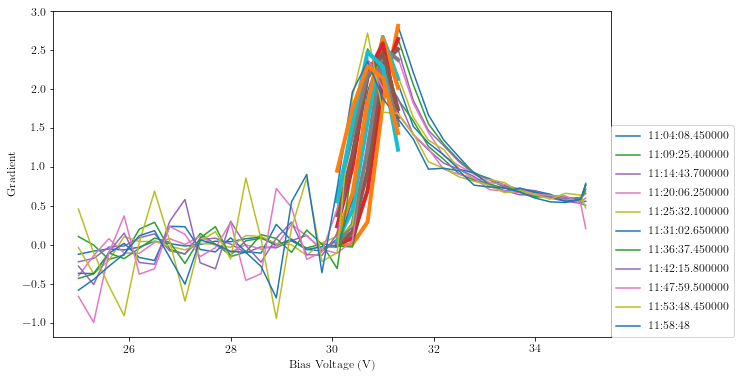

28
28
28


In [15]:
plt.figure(figsize=(10,6))
# print (len(data_2.Gradient))

for x,y,z in zip(data_2.AvgVoltage,data_2.Gradient,data_2.AvgTimestamp):
    min_x=30
    max_x=31.5
    cut=np.where((x<max_x) & (x>min_x))
    plt.plot(x,y,label=dt.timedelta(seconds=z))
    popt,pocv=curve_fit(func,x[cut],y[cut],p0=[np.max(y/x),x[np.where((y/x)==np.max(y/x))][0],1],maxfev=10000000)
    plt.plot(x[cut],func(x[cut],*popt),lw=4)
    grad_max=(x[np.where(y==np.max(y))])
#     print(grad_max)
    breakdownV.append(grad_max)
    timestampT.append(z)
    breakdownv_fit.append(popt[1])
#     print(popt[1])
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Gradient')
plt.legend(loc=(1.0,0))
plt.show()
print(len(breakdownV))
print(len(timestampT))
print(len(breakdownv_fit))

In [16]:
data_3=IVCurve.IVCurve(Path='/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/',Selection='*Cooldown_3.h5')
for File in data_3.Files:
    print (File)
    data_3.get_data()
    print(len(data_3.Current))
    data_3.get_average()
    print(len(data_3.Current))
    data_3.get_gradient(data_3.AvgVoltage,data_3.AvgCurrent)
    data_3.format_timestamp(Format='datetime')

/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/Cooldown_3.h5
24
24


0 45539
['35881', '36027', '36174', '36321', '36470', '36620', '36771', '36919', '37066', '37212', '37365', '37511', '37658', '37804', '37950', '38098', '38245', '38378', '39698', '40015', '40332', '40653', '40976', '41305', '41638', '41974', '42315', '42662', '43012', '43244', '45539', '46014']


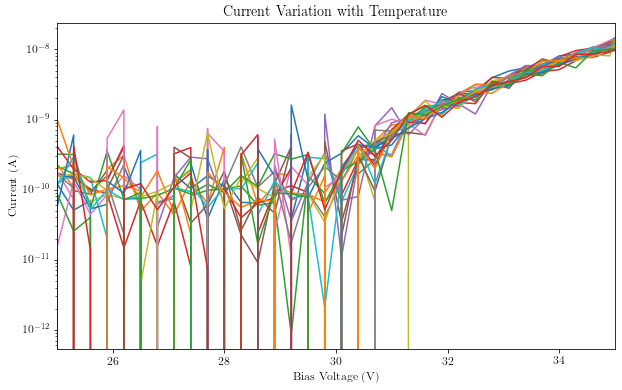

In [17]:
plt.figure(figsize=(10,6))
size=(len(data_3.Current))

for i in range(len(data_3.Timestamp)):
    if i*size>=len(data_3.Timestamp):
        break
    print(i*size,data_3.Timestamp[i*size])
    avg_timestamp.append(data_3.Timestamp[i*size])
avg_timestamp.append(data_3.Timestamp[-1])
print(avg_timestamp)
for x,y,z in zip(data_3.Voltage,data_3.Current,data_3.Timestamp):
    plt.plot(x,y,label=z)#,color=color_array[y])
    all_voltage.append(x)
    all_current.append(y)
    all_timestamp.append(float(z))
# plt.legend(loc=2)
plt.xlim(25,35)
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Current Variation with Temperature')
plt.yscale('log')
plt.show()

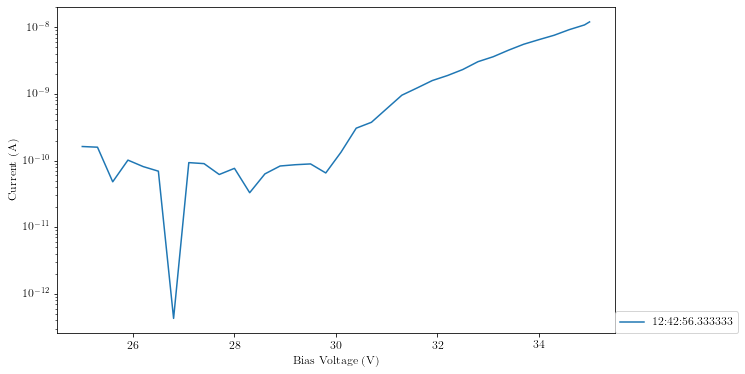

In [18]:
plt.figure(figsize=(10,6))
# print (data_3.AvgCurrent)
# print(data_3.AvgVoltage)
for x,y,z in zip(data_3.AvgVoltage,data_3.AvgCurrent,data_3.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.legend(loc=(1.0,0))
plt.show()

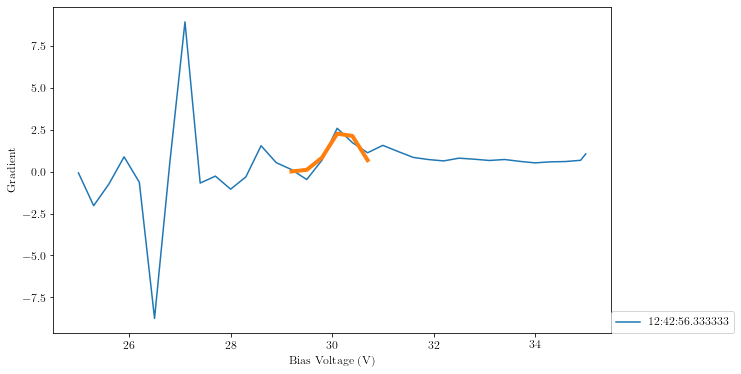

29
29
29


In [19]:
plt.figure(figsize=(10,6))

for x,y,z in zip(data_3.AvgVoltage,data_3.Gradient,data_3.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
    min_x=29
    max_x=31
    cut=np.where((x>min_x) & (x<max_x))
    popt,pocv=curve_fit(func,x[cut],y[cut],p0=[np.max(y[cut]/x[cut]),x[np.where((y[cut]/x[cut])==np.max(y[cut]/x[cut]))][0],1],maxfev=10000)
    plt.plot(x[cut],func(x[cut],*popt),lw=4)
#     print(popt[1])
    grad_max=x[np.where(y==np.max(y[cut]))]
#     print(grad_max)
    breakdownV.append(grad_max)
    timestampT.append(z)  
    breakdownv_fit.append(popt[1])
# plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Gradient')
plt.legend(loc=(1.0,0))
plt.show()
print(len(breakdownV))
print(len(timestampT))
print(len(breakdownv_fit))

In [20]:
data_4=IVCurve.IVCurve(Path='/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/',Selection='*Cooldown_4.h5')
for File in data_4.Files:
    print (File)
    data_4.get_data()
    print(len(data_4.Current))
    data_4.get_average(Size=24)
    print(len(data_4.Current))
    data_4.get_gradient(data_4.AvgVoltage,data_4.AvgCurrent)
    data_4.format_timestamp(Format='datetime')

/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/Cooldown_4.h5
48
48


48015
48630
['35881', '36027', '36174', '36321', '36470', '36620', '36771', '36919', '37066', '37212', '37365', '37511', '37658', '37804', '37950', '38098', '38245', '38378', '39698', '40015', '40332', '40653', '40976', '41305', '41638', '41974', '42315', '42662', '43012', '43244', '45539', '46014', '48015', '48630', '49219']


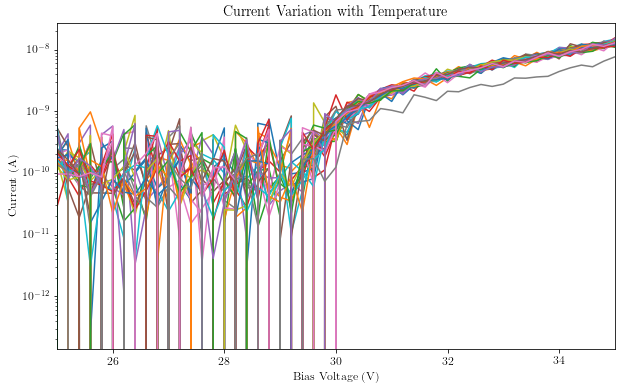

In [21]:
plt.figure(figsize=(10,6))
size=24

for i in range(len(data_4.Timestamp)):
    if i*size>=len(data_4.Timestamp):
        break
    avg_timestamp.append(data_4.Timestamp[i*size])
    print (data_4.Timestamp[i*size])
avg_timestamp.append(data_4.Timestamp[-1])    
print(avg_timestamp)
for x,y,z in zip(data_4.Voltage,data_4.Current,data_4.Timestamp):
    plt.plot(x,y,label=z)#,color=color_array[y])
    all_voltage.append(x)
    all_current.append(y)
    all_timestamp.append(float(z))
# plt.legend(loc=2)
plt.xlim(25,35)
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Current Variation with Temperature')
plt.yscale('log')
plt.show()

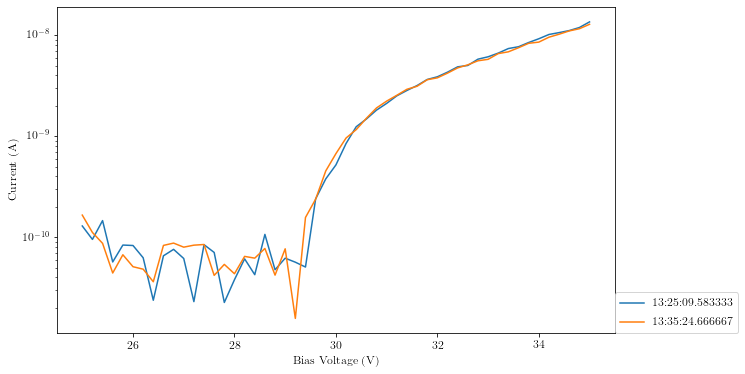

In [22]:
plt.figure(figsize=(10,6))

for x,y,z in zip(data_4.AvgVoltage,data_4.AvgCurrent,data_4.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.legend(loc=(1.0,0))
plt.show()

[29.6]
29.559746779232174
[29.4]
29.423246112835937


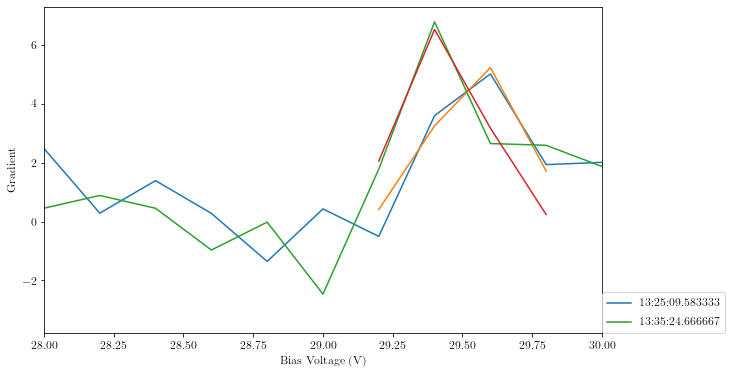

31
31
31


In [23]:
plt.figure(figsize=(10,6))
# print (len(data_4.Gradient))

for x,y,z in zip(data_4.AvgVoltage,data_4.Gradient,data_4.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
    min_x=29
    max_x=30
    cut=np.where((x<max_x) & (x>min_x))
    popt,pocv=curve_fit(func,x[cut],y[cut],p0=[np.max(y/x),x[np.where((y/x)==np.max(y/x))][0],1])
    plt.plot(x[cut],func(x[cut],*popt))
    grad_max=(x[y==np.max(y)])
    print(grad_max)
    print(popt[1])
    breakdownV.append(grad_max)
    timestampT.append(z)  
    breakdownv_fit.append(popt[1])
# plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.xlim(28,30)
plt.ylabel('Gradient')
plt.legend(loc=(1.0,0))
plt.show()
print(len(breakdownV))
print(len(timestampT))
print(len(breakdownv_fit))

In [24]:
data_5=IVCurve.IVCurve(Path='/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/',Selection='*Cooldown_5.h5')
for File in data_5.Files:
    print (File)
    data_5.get_data()
    print(len(data_5.Current))
    data_5.get_average(Size=48)
    print(len(data_5.Current))
    data_5.get_gradient(data_5.AvgVoltage,data_5.AvgCurrent)
    data_5.format_timestamp(Format='datetime')

/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/Cooldown_5.h5
96
96


['35881', '36027', '36174', '36321', '36470', '36620', '36771', '36919', '37066', '37212', '37365', '37511', '37658', '37804', '37950', '38098', '38245', '38378', '39698', '40015', '40332', '40653', '40976', '41305', '41638', '41974', '42315', '42662', '43012', '43244', '45539', '46014', '48015', '48630', '49219', '49648', '50509', '51354']


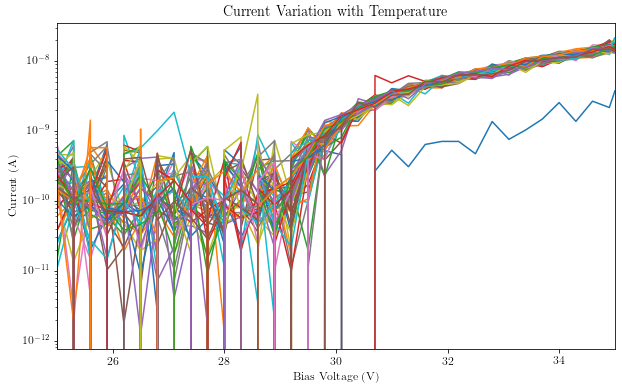

In [25]:
plt.figure(figsize=(10,6))
size=48
for i in range(len(data_5.Timestamp)):
    if (i*size>=len(data_5.Timestamp)):
        break
    avg_timestamp.append(data_5.Timestamp[i*size])
avg_timestamp.append(data_5.Timestamp[-1]) 
print(avg_timestamp)
for x,y,z in zip(data_5.Voltage,data_5.Current,data_5.Timestamp):
    plt.plot(x,y,label=z)#,color=color_array[y])
    all_voltage.append(x)
    all_current.append(y)
    all_timestamp.append(float(z))
# plt.legend(loc=2)
plt.xlim(25,35)
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Current Variation with Temperature')
plt.yscale('log')
plt.show()

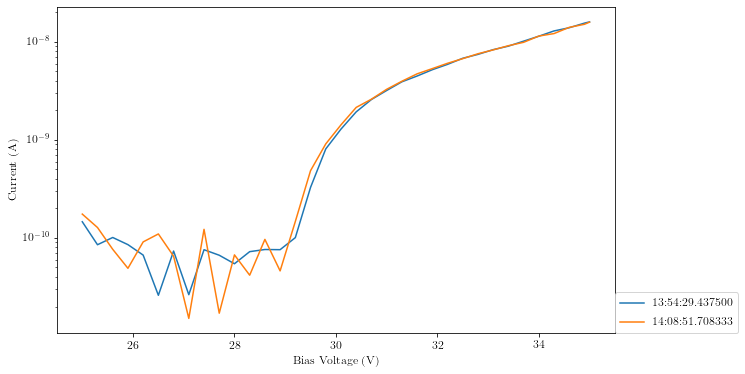

In [26]:
plt.figure(figsize=(10,6))
# print (data_5.AvgCurrent)
# print(data_5.AvgVoltage)
for x,y,z in zip(data_5.AvgVoltage,data_5.AvgCurrent,data_5.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.legend(loc=(1.0,0))
plt.show()

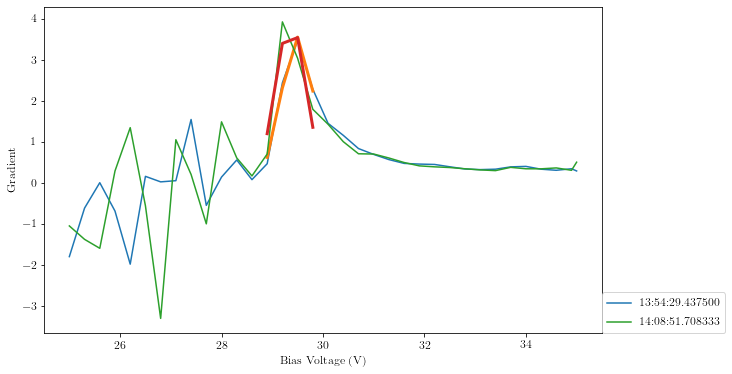

33
33
33


In [27]:
plt.figure(figsize=(10,6))
# print (len(data_5.Gradient))

for x,y,z in zip(data_5.AvgVoltage,data_5.Gradient,data_5.AvgTimestamp):
    min_x=28.8
    max_x=30
    plt.plot(x,y,label=dt.timedelta(seconds=z))
    cut=np.where((x<max_x) & (x>min_x))
    popt,pocv=curve_fit(func,x[cut],y[cut],p0=[np.max(y/x),x[np.where((y/x)==np.max(y/x))][0],1],maxfev=10000000)
    plt.plot(x[cut],func(x[cut],*popt),lw=3)
    grad_max=x[np.where(y==np.max(y))]
    breakdownV.append(grad_max)
    timestampT.append(z)    
    breakdownv_fit.append(popt[1])

plt.xlabel('Bias Voltage (V)')
plt.ylabel('Gradient')
plt.legend(loc=(1.0,0))
plt.show()
print(len(breakdownV))
print(len(timestampT))
print(len(breakdownv_fit))

In [28]:
data_6=IVCurve.IVCurve(Path='/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/',Selection='*Cooldown_6.h5')
for File in data_6.Files:
    print (File)
    data_6.get_data()
    print(len(data_6.Current))
    data_6.get_average(Size=10)
    print(len(data_6.Current))
    data_6.get_gradient(data_6.AvgVoltage,data_6.AvgCurrent)
    data_6.format_timestamp(Format='datetime')

/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/Cooldown_6.h5
172
172


../../../purity-monitor/IVCurve.py:33: RuntimeWarning: invalid value encountered in log
  grad = np.gradient(np.log(y))/np.gradient(x)
../../../purity-monitor/IVCurve.py:33: RuntimeWarning: divide by zero encountered in true_divide
  grad = np.gradient(np.log(y))/np.gradient(x)


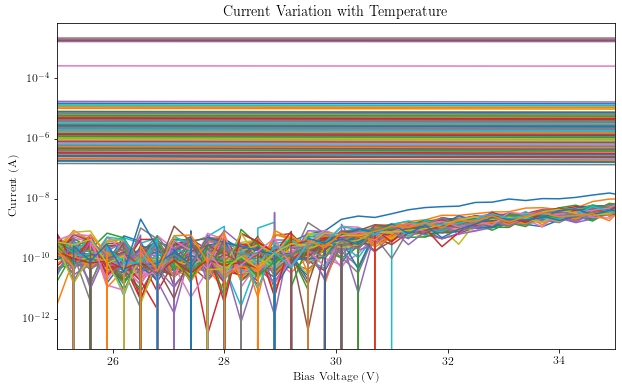

In [29]:
plt.figure(figsize=(10,6))
size=10
for x,y,z in zip(data_6.Voltage,data_6.Current,data_6.Timestamp):
    plt.plot(x,y,label=z)#,color=color_array[y])
# plt.legend(loc=2)
plt.xlim(25,35)
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Current Variation with Temperature')
plt.yscale('log')
plt.show()

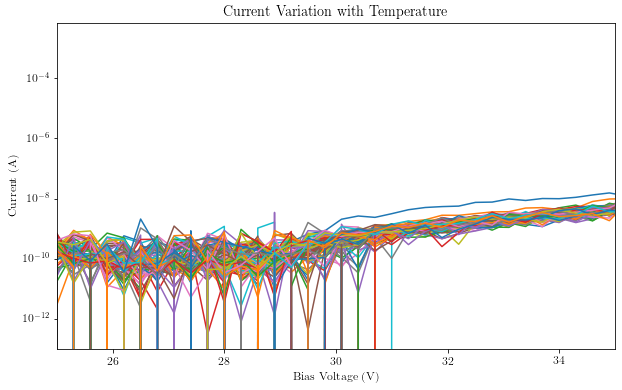

172


In [30]:
plt.figure(figsize=(10,6))
data_6_Voltage=[]
data_6_Current=[]
data_6_Timestamp=[]
for x,y,z in zip(data_6.Voltage,data_6.Current,data_6.Timestamp):
    cut=np.where(x!=-999.)
    plt.plot(x[cut],y[cut],label=z)#,color=color_array[y])
    data_6_Voltage.append(x[cut])
    data_6_Current.append(y[cut])
    data_6_Timestamp.append(z)# don't cut on timestamps because each curve has 1 timestamp irrespective of -999
    all_voltage.append(x[cut])
    all_current.append(y[cut])
    all_timestamp.append(float(z))
# plt.legend(loc=2)
plt.xlim(25,35)
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Current Variation with Temperature')
plt.yscale('log')
plt.show()
# print (data_6_Voltage)
# print (data_6_Current)
print (len(data_6_Voltage))

In [31]:
from itertools import zip_longest
Size=86
data_6_AvgVoltage=[]
data_6_AvgCurrent=[]
data_6_AvgTimestamp=[]
for x in range(len(data_6_Current)):
            ii = x*Size
            if ii >= len(data_6_Current):
                break
#             voltage = np.mean(data_6_Voltage[ii:ii+Size], axis=0)
#             current = np.median(data_6_Current[ii:ii+Size], axis=0)
            voltage=np.nanmean(np.array(list(zip_longest(*data_6_Voltage[ii:ii+Size])),dtype=float),axis=1)
            current=np.nanmedian(np.array(list(zip_longest(*data_6_Current[ii:ii+Size])),dtype=float),axis=1)
            timestamp = np.mean([float(x) for x in data_6_Timestamp[ii:ii+Size]])
            data_6_AvgVoltage.append(voltage)
            data_6_AvgCurrent.append(current)
            data_6_AvgTimestamp.append(timestamp)
            
for i in range(len(data_6_Timestamp)):
    if i*Size>=len(data_6_Timestamp):
        break
    avg_timestamp.append(data_6_Timestamp[i*Size])
avg_timestamp.append(data_6_Timestamp[-1])
print(avg_timestamp)

['35881', '36027', '36174', '36321', '36470', '36620', '36771', '36919', '37066', '37212', '37365', '37511', '37658', '37804', '37950', '38098', '38245', '38378', '39698', '40015', '40332', '40653', '40976', '41305', '41638', '41974', '42315', '42662', '43012', '43244', '45539', '46014', '48015', '48630', '49219', '49648', '50509', '51354', '51805', '53411', '54981']


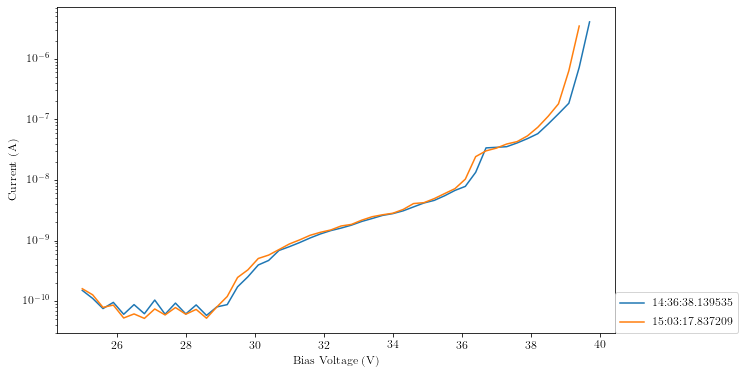

In [32]:
plt.figure(figsize=(10,6))
# print (data_5.AvgCurrent)
# print(data_5.AvgVoltage)
for x,y,z in zip(data_6_AvgVoltage,data_6_AvgCurrent,data_6_AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.legend(loc=(1.0,0))
plt.show()

In [33]:
data_6_Gradient=[]
for x,y in zip(data_6_AvgVoltage,data_6_AvgCurrent):
            grad = np.gradient(np.log(y))/np.gradient(x)
            data_6_Gradient.append(grad)

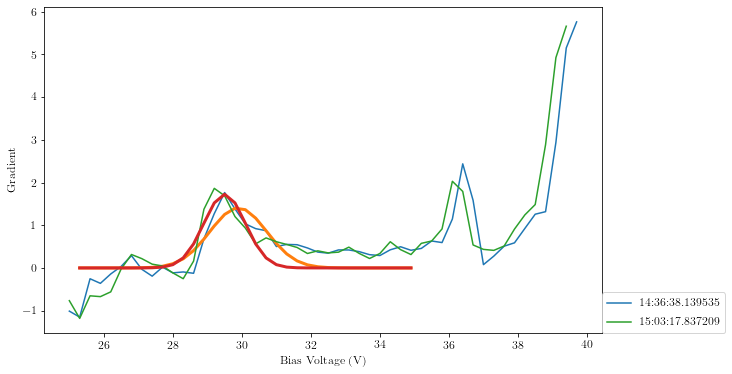

35
35
35


In [34]:
plt.figure(figsize=(10,6))
# print (len(data_6_Gradient))

for x,y,z in zip(data_6_AvgVoltage,data_6_Gradient,data_6_AvgTimestamp):
    min_x=25
    max_x=35
    plt.plot(x,y,label=dt.timedelta(seconds=z))
    cut=np.where((x<max_x) & (x>min_x))
    popt,pocv=curve_fit(func,x[cut],y[cut],p0=[np.max(y/x),x[np.where((y/x)==np.max(y/x))][0],1],maxfev=10000000)
    plt.plot(x[cut],func(x[cut],*popt),lw=3)
    grad_max=x[np.where(y==np.max(y[cut]))]
#     print(grad_max)
#     print(popt[1])
    breakdownV.append(grad_max)
    breakdownv_fit.append(popt[1])
    timestampT.append(z)
# plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Gradient')
plt.legend(loc=(1.0,0))
plt.show()
print(len(breakdownV))
print(len(timestampT))
print(len(breakdownv_fit))

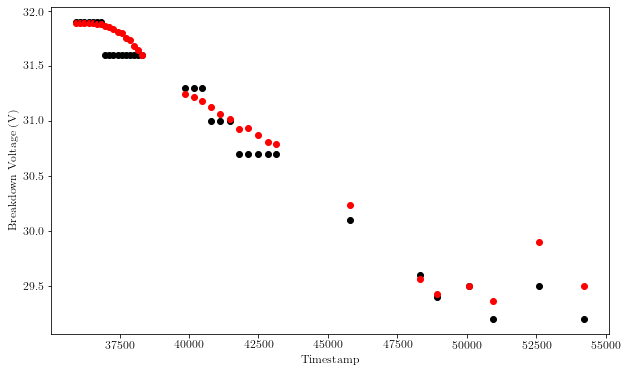

In [35]:
plt.figure(figsize=(10,6))
for x,y,z in zip(timestampT,breakdownV,breakdownv_fit):
    plt.scatter(x,y,label='From Data',color='k')
    plt.scatter(x,z,label='From Fit',color='red')
plt.ylabel('Breakdown Voltage (V)')
plt.xlabel('Timestamp')
plt.show()

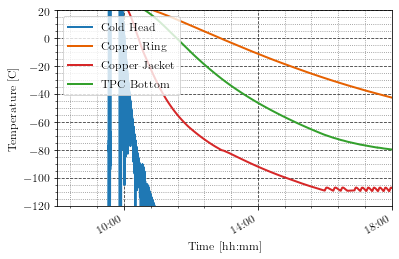

In [36]:
Sensors = []
Files = ['/project/david_moore/aj487/Data_WL110/LXe_Setup/Sensors/20211108.h5']
for File in Files: 
    Sensor = Monitor.SensorData(Filepath=File)
    Sensor.GetData()
    Sensors.append(Sensor)

AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors)
XRange = [dt.datetime(2021,11,8,8,0), dt.datetime(2021,11,8,18,0)]
AllSensors.PlotData(Data=AllSensors.Temp, Selection='Temperature', XTicks=240, YTicks=20, XRange=XRange, YRange=[-120,20])

In [37]:
print (AllSensors.Temp[2])

[  23.64537436   23.6455309    23.6455309  ... -107.02182954 -107.02556428
 -107.02556428]


In [38]:
print(AllSensors.Time)

[datetime.datetime(2021, 11, 8, 0, 0, 0, 4601)
 datetime.datetime(2021, 11, 8, 0, 0, 0, 503994)
 datetime.datetime(2021, 11, 8, 0, 0, 1, 6093) ...
 datetime.datetime(2021, 11, 8, 23, 30, 39, 265108)
 datetime.datetime(2021, 11, 8, 23, 30, 39, 765108)
 datetime.datetime(2021, 11, 8, 23, 30, 40, 266108)]


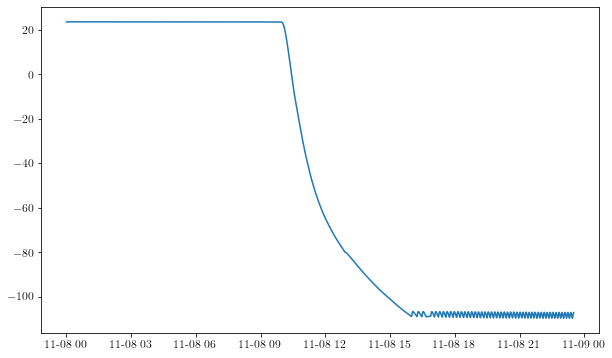

In [39]:
plt.figure(figsize=(10,6))
# for temp,time in zip(AllSensors.Temp[2],AllSensors.Time):
plt.plot(AllSensors.Time,AllSensors.Temp[2])
plt.show()

In [50]:
time_sec=[]
start=dt.datetime(2021,11,8,0,0)
for time in AllSensors.Time:
    time_sec.append((time-start).seconds)
print (len(time_sec))   

167591


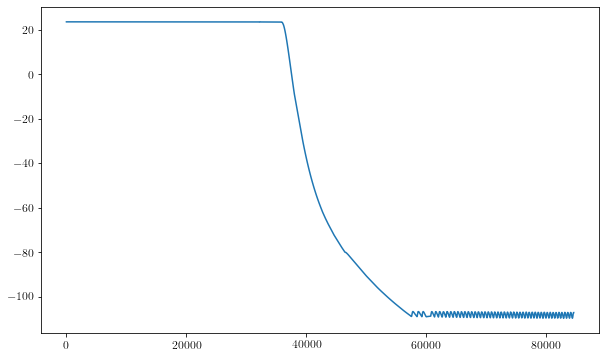

In [41]:
plt.figure(figsize=(10,6))
# for temp,time in zip(AllSensors.Temp[2],AllSensors.Time):
plt.plot(time_sec,AllSensors.Temp[2])
plt.show()

[23.52656060208834, 23.07388579956297, 22.087823061734262, 20.588704357671865, 18.662560021875297, 16.366980728893182, 13.837265768872479, 11.206041965463434, 8.447054211644135, 5.601254695053876, 2.659995074533764, -0.19446069778436706, -3.021036770235236, -5.828324596612093, -8.542551412082062, -10.957089439886627, -13.211779862907655, -35.344719447691574, -39.206023268059965, -42.804367293858434, -46.17096581003359, -49.31206563171763, -52.269624806120426, -55.03668905570876, -57.61851518741368, -60.056442080707285, -62.39743018824946, -64.186095559371, -77.09281707182734, -85.16149279051791, -87.12417350743073, -90.63656562871621, -93.14750342045872, -97.61014982272174, -101.51826799963935]
[23.52656060208834, 23.07388579956297, 22.087823061734262, 20.588704357671865, 18.662560021875297, 16.366980728893182, 13.837265768872479, 11.206041965463434, 8.447054211644135, 5.601254695053876, 2.659995074533764, -0.19446069778436706, -3.021036770235236, -5.828324596612093, -8.542551412082062

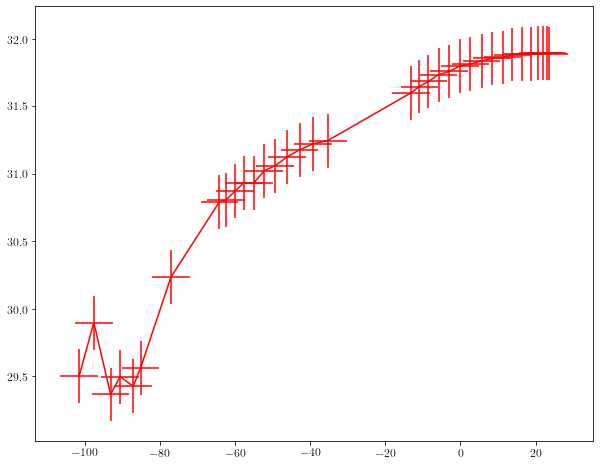

In [42]:
breakdown_temp=[]
breakdownT_avg_range=[]
# print(len(time_sec))
# print(len(avg_timestamp))

for x in (timestampT):
    sub=np.abs(np.array(time_sec)-np.array(x))
    cut=np.where(sub==np.min(sub))
    breakdown_temp.append(AllSensors.Temp[2][cut][0])
print (breakdown_temp)
    
for x in timestampT:
    diff=np.abs(np.array(time_sec)-np.array(float(x)))
    cut2=np.where(diff==np.min(diff))
    breakdownT_avg_range.append(AllSensors.Temp[2][cut2][0])
print ((breakdownT_avg_range))    
# print(len(breakdownv_fit))    
# print(time_sec)
plt.figure(figsize=(10,8))
# plt.errorbar(breakdown_temp,breakdownV,yerr=0.15,xerr=0.5,fmt='o',color='k')
plt.errorbar(breakdown_temp,breakdownv_fit,yerr=0.2,xerr=5,color='r')
# plt.plot(breakdown_temp,breakdownV)
plt.show()


In [43]:
df_V=pd.DataFrame(breakdownv_fit)
df_T=pd.DataFrame(breakdown_temp)
df=pd.concat([df_V,df_T],axis=1)
# print (df)
df.columns=('Voltage','Temperature')
df_difference=np.abs(df.diff(axis=0))
df_difference['Temperature'].replace({22.13293958478392:3,12.906721512456343:4},inplace=True)
# diff=df_difference['Temperature'].values.tolist()
# print (diff)

# df_avg=df.groupby(['Voltage']).mean()
# df_new=df_avg.reset_index()
# print(df_new)

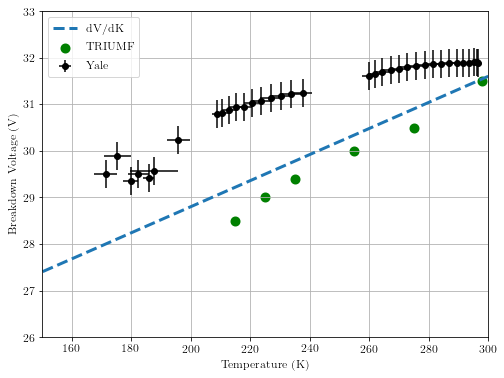

In [44]:
fig=plt.figure(figsize=(8,6))
def func(x,m,c):
    return(m*x+c)
df['Temperature']=(df['Temperature']+273)
plt.errorbar(df['Temperature'],df['Voltage'],xerr=df_difference['Temperature'],yerr=0.3,fmt='o',color='k',label='Yale')
popt,pocv=curve_fit(func,df['Temperature'],df['Voltage'],p0=[0.5,35],maxfev=1000)
# plt.plot(df['Temperature'],func(df['Temperature'],*popt),'--',lw=3)
d={'Temp':[215,225,235,255,275,298],'Vol':[28.5,29,29.4,30,30.5,31.5]}
df_triumf=pd.DataFrame(d)
plt.scatter(df_triumf['Temp'],df_triumf['Vol'],label='TRIUMF',lw=4,color='green')
# temp=np.linspace(100,300,300)
# plt.plot(temp,func(temp,0.028,(26-(0.028*100))),'--',color='red',lw=3)
plt.plot([100,300],[26,31.6],'--',lw=3,label='dV/dK')
plt.xlabel('Temperature (K)')
plt.ylabel('Breakdown Voltage (V)')
plt.grid()
plt.legend(loc=2)
plt.xlim(150,300)
plt.ylim(26,33)
plt.show()
fig.savefig('breakdownvsT.pdf',dpi=500)

In [60]:
print(len(all_current))
print(len(all_voltage))
print(len(all_timestamp))
all_temperature=[]
sensor_time=[]
init=dt.datetime(2021,11,8,0,0)
for x in AllSensors.Time:
    sensor_time.append((x-init).seconds)
print(len(sensor_time))
for t in all_timestamp:
    diff=np.abs(np.array(t)-np.array(sensor_time))
    cut=np.where(diff==np.min(diff))
    all_temperature.append(AllSensors.Temp[2][cut][0])
print(len(all_temperature))

724
724
724
167591
724
